### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Data Preprocessing and Exploration

In [ ]:
# Load the dataset
df = pd.read_csv('sonardataset.csv')

In [ ]:
# Initial inspection
print(df.head())

      x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

     x_10  ...    x_52    x_53    x_54    x_55    x_56    x_57    x_58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

     x_59    x_60  Y  
0  0.0090  0.0032  R  
1  0.0052  0.0044  R  
2  0.0095  0.0078  R  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [ ]:
### summarize

df.describe()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
print(df['Y'].value_counts())

Y
M    111
R     97
Name: count, dtype: int64


In [ ]:
# Split features and target
X = df.drop('Y', axis=1).values
y = df['Y'].values

In [ ]:
# Encode target (M=0, R=1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
# Normalize/Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Implementation

In [ ]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
### model implementaion for gridsearch

def create_model(layers=[12], activation='relu', learning_rate=0.001):
    model = Sequential()
    # Input layer and first hidden layer
    model.add(Dense(layers[0], input_dim=60, activation=activation))

    # Additional hidden layers if specified
    for units in layers[1:]:
        model.add(Dense(units, activation=activation))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

### Hyperparamter Tuning

In [ ]:
results = []
param_grid = {
    'layers': [[12], [24], [24, 12]],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
best_acc = 0
best_params = {}

In [ ]:
for layers in param_grid['layers']:
    for act in param_grid['activation']:
        for lr in param_grid['learning_rate']:
            model = create_model(layers=layers, activation=act, learning_rate=lr)
            # Train model
            history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
            # Evaluate
            _, acc = model.evaluate(X_test, y_test, verbose=0)

            results.append({
                'layers': layers,
                'activation': act,
                'learning_rate': lr,
                'accuracy': acc
            })

            if acc > best_acc:
                best_acc = acc
                best_params = {'layers': layers, 'activation': act, 'learning_rate': lr}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

In [ ]:
print(f"\nBest Parameters found: {best_params}")
print(f"Best Test Accuracy: {best_acc:.4f}")


Best Parameters found: {'layers': [12], 'activation': 'relu', 'learning_rate': 0.01}
Best Test Accuracy: 0.9048


### Evaluation

In [ ]:
# Train the best model for more epochs to see convergence

best_model = create_model(**best_params)
history = best_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

In [ ]:
# Predictions
y_pred_probs = best_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("\n--- Final Model Performance (Tuned) ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


--- Final Model Performance (Tuned) ---
Accuracy:  0.8333
Precision: 0.7368
Recall:    0.8750
F1-Score:  0.8000

Classification Report:
              precision    recall  f1-score   support

           M       0.91      0.81      0.86        26
           R       0.74      0.88      0.80        16

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42



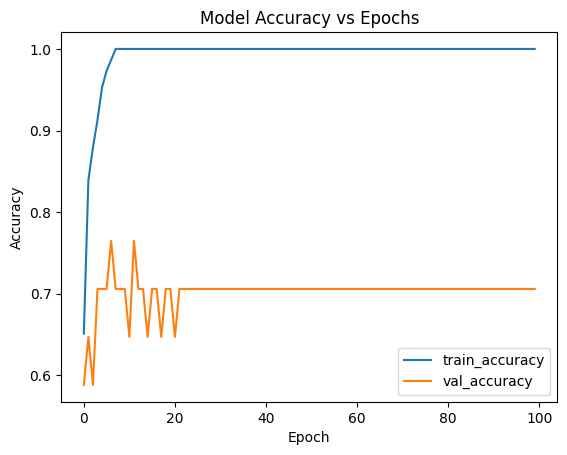

In [ ]:
# Plot training history

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Output the default model for comparison (per instruction)
default_model = create_model(layers=[12], activation='relu', learning_rate=0.01) # Example default
default_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_pred_def = (default_model.predict(X_test) > 0.5).astype(int)
def_acc = accuracy_score(y_test, y_pred_def)
print(f"\nDefault Model Accuracy: {def_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Default Model Accuracy: 0.8810
